In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

Reading the csv file starting from row 4 (euro vs uk)

In [156]:
df_gbp_euro = pd.read_csv('data_uk_2.csv', skiprows=4)
df_gbp_euro.dropna(inplace=True)

In [157]:
df_gbp_euro

,Period\Unit:,[UK pound sterling ]
2023-09-01,0.85538,Normal value (A)
2023-08-31,0.85718,Normal value (A)
2023-08-30,0.85920,Normal value (A)
2023-08-29,0.85860,Normal value (A)
2023-08-28,0.85815,Normal value (A)
...,...,...
1999-01-08,0.70940,Normal value (A)
1999-01-07,0.70585,Normal value (A)
1999-01-06,0.70760,Normal value (A)
1999-01-05,0.71220,Normal value (A)


- renaming the column 'Period\\Unit' to 'Time'
- Column 'Time' has unclean data, places where there are hyphens instead of numbers
- I will take the column 'Period\Unit', I will assign it to a variable, change the hyphens to NaNs, reassign the new adjusted column to the original dataframe
- clean - remove records that have NaN values
- add a new column called 'date' that contains the index values of the dataframe (in our case, the index column had the dates)
- creating a plot of the data in the 'df_uk_euro' that has 'date' as the x-axis and 'Period\Unit' as the y-axis
- observe the UK currency against the euro

In [158]:
df_gbp_euro.rename(columns={'Period\\Unit:': 'GBP'}, inplace=True)


In [159]:
df_gbp_euro

,GBP,[UK pound sterling ]
2023-09-01,0.85538,Normal value (A)
2023-08-31,0.85718,Normal value (A)
2023-08-30,0.85920,Normal value (A)
2023-08-29,0.85860,Normal value (A)
2023-08-28,0.85815,Normal value (A)
...,...,...
1999-01-08,0.70940,Normal value (A)
1999-01-07,0.70585,Normal value (A)
1999-01-06,0.70760,Normal value (A)
1999-01-05,0.71220,Normal value (A)


In [160]:
dat = df_gbp_euro['GBP'].replace('-', float('nan')).astype(float)
df_gbp_euro['GBP'] = dat
df_gbp_euro.dropna(inplace=True)
df_gbp_euro['date'] = df_gbp_euro.index


In [161]:
df_gbp_euro

,GBP,[UK pound sterling ],date
2023-09-01,0.85538,Normal value (A),2023-09-01
2023-08-31,0.85718,Normal value (A),2023-08-31
2023-08-30,0.85920,Normal value (A),2023-08-30
2023-08-29,0.85860,Normal value (A),2023-08-29
2023-08-28,0.85815,Normal value (A),2023-08-28
...,...,...,...
1999-01-08,0.70940,Normal value (A),1999-01-08
1999-01-07,0.70585,Normal value (A),1999-01-07
1999-01-06,0.70760,Normal value (A),1999-01-06
1999-01-05,0.71220,Normal value (A),1999-01-05


In [162]:
from datetime import datetime
date = pd.to_datetime(df_gbp_euro['date'])
df_gbp_euro['date'] = date
df_gbp_euro.head()

#because the index it's the date, I will drop it and recreate it. the date column I will recreate it as well as a normal columns 
df_gbp_euro.reset_index(drop=True, inplace=True)
df_gbp_euro.index = range(0, len(df_gbp_euro))

df_gbp_euro


,GBP,[UK pound sterling ],date
0,0.85538,Normal value (A),2023-09-01
1,0.85718,Normal value (A),2023-08-31
2,0.85920,Normal value (A),2023-08-30
3,0.85860,Normal value (A),2023-08-29
4,0.85815,Normal value (A),2023-08-28
...,...,...,...
6314,0.70940,Normal value (A),1999-01-08
6315,0.70585,Normal value (A),1999-01-07
6316,0.70760,Normal value (A),1999-01-06
6317,0.71220,Normal value (A),1999-01-05


Calculating the highest and the lowest depriciation against euro (the highest and the lowest historical value in the dataset)

<Axes: xlabel='date'>

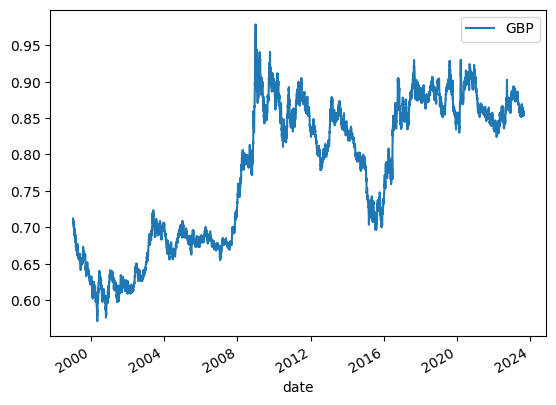

In [163]:
df_gbp_euro.plot(x='date', y=['GBP'])

Max val of 0.979 at date 3761
Min val of 0.571 at date 5975


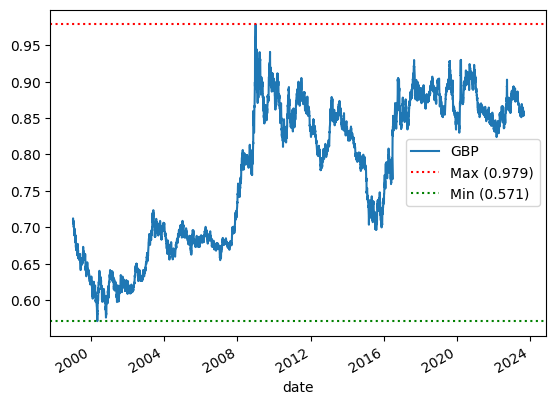

In [164]:
# Plot the DataFrame
ax = df_gbp_euro.plot(x='date', y=['GBP'])

# Calculate maximum and minimum values and their indices
max_val = df_gbp_euro['GBP'].max()
max_idx = df_gbp_euro['GBP'].idxmax()
min_val = df_gbp_euro['GBP'].min()
min_idx = df_gbp_euro['GBP'].idxmin()

# Print the results
print(f"Max val of {max_val:.3f} at date {max_idx}")
print(f"Min val of {min_val:.3f} at date {min_idx}")

# Add dotted lines for maximum and minimum values
ax.axhline(max_val, color='red', linestyle='dotted', label=f'Max ({max_val:.3f})')
ax.axhline(min_val, color='green', linestyle='dotted', label=f'Min ({min_val:.3f})')

# Show the legend
ax.legend()

# Show the plot
plt.show()


- See the difference between 2 days in order to determine the highest appreciation and depreciation against Euro in one day

<Axes: >

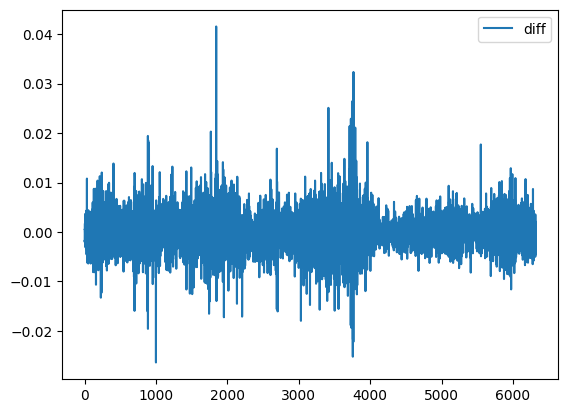

In [165]:
df_gbp_euro['diff'] = df_gbp_euro['GBP'].diff(-1)
df_gbp_euro.plot(y=['diff'])

<Axes: xlabel='date'>

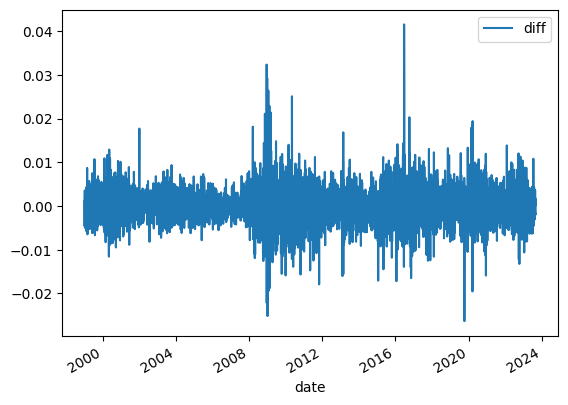

In [167]:
df_gbp_euro.plot(x= 'date', y = ['diff'])